In [16]:
!pip install datasets
!pip install evaluate
!pip install seaborn 

In [1]:
import datasets 

/home/vamsi.srivathsa/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from tqdm import tqdm
# from huggingface_hub import HfApi, ModelFilter, ModelSearchArguments, list_models
import json, requests
from multiprocessing import Pool
import json, pandas as pd, numpy as np, os
from datasets import load_dataset
# import evaluate
import matplotlib.pyplot as plt, seaborn as sns

In [9]:
df_models = pd.read_csv("final_100file.csv")
df_models

,model,Ouput,_id,downloads,likes,architectures,datasets,language,metrics,pipeline_tag,lastModified,tags,#classes,is_sa,Source,scores,downloadsAllTime
0,cardiffnlp/twitter-roberta-base-sentiment-latest,"['positive', 'neutral', 'negative']",622fea36174feb5439c2e4be,1264546.0,238.0,['RobertaForSequenceClassification'],['tweet_eval'],en,NaN,text-classification,2023-05-28T05:45:10.000Z,"['transformers', 'pytorch', 'tf', 'roberta', '...",3,y,Tweets Dataset,NaN,245504181.0
1,mrm8488/distilroberta-finetuned-financial-news...,"['neutral', 'positive', 'negative']",621ffdc136468d709f17e2c1,349196.0,85.0,['RobertaForSequenceClassification'],['financial_phrasebank'],NaN,['accuracy'],text-classification,2023-03-16T20:03:13.000Z,"['transformers', 'pytorch', 'tensorboard', 'sa...",3,y,Financial Phrasebank Dataset,"[{'name': 'distilRoberta-financial-sentiment',...",132636398.0
2,cardiffnlp/twitter-roberta-base-sentiment,"['LABEL_2', 'LABEL_1', 'LABEL_0']",621ffdc136468d709f179e37,918648.0,210.0,['RobertaForSequenceClassification'],['tweet_eval'],['en'],NaN,text-classification,2023-01-20T09:52:13.000Z,"['transformers', 'pytorch', 'tf', 'jax', 'robe...",3,y,Tweets Dataset,NaN,90763177.0
3,lxyuan/distilbert-base-multilingual-cased-sent...,"['positive', 'neutral', 'negative']",64552d5fd55525a4fee98c2a,36147.0,19.0,['DistilBertForSequenceClassification'],['tyqiangz/multilingual-sentiments'],"['en', 'ar', 'de', 'es', 'fr', 'ja', 'zh', 'id...",NaN,text-classification,2023-06-24T04:09:07.000Z,"['transformers', 'pytorch', 'safetensors', 'di...",3,y,Multilingual Sentiment,[{'name': 'distilbert-base-multilingual-cased-...,56371162.0
4,ProsusAI/finbert,"['neutral', 'positive', 'negative']",621ffdc036468d709f176f71,2737414.0,339.0,['BertForSequenceClassification'],NaN,en,NaN,text-classification,2023-05-23T12:43:35.000Z,"['transformers', 'pytorch', 'tf', 'jax', 'bert...",3,y,NaN,NaN,42086975.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,svalabs/twitter-xlm-roberta-bitcoin-sentiment,"['Positive', 'Neutral', 'Negative']",62723aa260a8d21bc2ab4257,7.0,1.0,['XLMRobertaForSequenceClassification'],NaN,NaN,NaN,text-classification,2022-05-12T09:28:14.000Z,"['transformers', 'pytorch', 'xlm-roberta', 'te...",3,y,NaN,NaN,8062.0
96,CAMeL-Lab/bert-base-arabic-camelbert-msa-senti...,"['positive', 'neutral', 'negative']",621ffdc036468d709f174e09,106.0,3.0,['BertForSequenceClassification'],NaN,['ar'],NaN,text-classification,2021-10-17T12:08:30.000Z,"['transformers', 'pytorch', 'tf', 'bert', 'tex...",3,y,NaN,NaN,7882.0
97,bardsai/finance-sentiment-de-base,"['neutral', 'negative', 'positive']",650835daf3060ea840faa177,8.0,0.0,['BertForSequenceClassification'],['datasets/financial_phrasebank'],de,"['f1', 'accuracy', 'precision', 'recall']",text-classification,2023-09-18T12:42:57.000Z,"['transformers', 'pytorch', 'bert', 'text-clas...",3,y,NaN,NaN,7754.0
98,kinit/slovakbert-sentiment-twitter,"['1', '0', '-1']",621ffdc136468d709f17d1f9,42.0,2.0,['RobertaForSequenceClassification'],NaN,['sk'],['f1'],text-classification,2023-05-31T09:12:44.000Z,"['transformers', 'pytorch', 'roberta', 'text-c...",3,y,NaN,NaN,7710.0


In [10]:
df_models['download_rank'] = df_models['downloadsAllTime'].rank(ascending=False, method='min').astype(int)
df_models['like_rank'] = df_models['likes'].rank(ascending=False, method='min').astype(int)

df_models['lastModifiedDate'] = pd.to_datetime(df_models['lastModified'])
df_models['date_rank'] = df_models['lastModifiedDate'].rank(ascending=False, method='min').astype(int)

In [12]:
df_models

,model,Ouput,_id,downloads,likes,architectures,datasets,language,metrics,pipeline_tag,...,tags,#classes,is_sa,Source,scores,downloadsAllTime,download_rank,like_rank,lastModifiedDate,date_rank
0,cardiffnlp/twitter-roberta-base-sentiment-latest,"['positive', 'neutral', 'negative']",622fea36174feb5439c2e4be,1264546.0,238.0,['RobertaForSequenceClassification'],['tweet_eval'],en,NaN,text-classification,...,"['transformers', 'pytorch', 'tf', 'roberta', '...",3,y,Tweets Dataset,NaN,245504181.0,1,2,2023-05-28 05:45:10+00:00,21
1,mrm8488/distilroberta-finetuned-financial-news...,"['neutral', 'positive', 'negative']",621ffdc136468d709f17e2c1,349196.0,85.0,['RobertaForSequenceClassification'],['financial_phrasebank'],NaN,['accuracy'],text-classification,...,"['transformers', 'pytorch', 'tensorboard', 'sa...",3,y,Financial Phrasebank Dataset,"[{'name': 'distilRoberta-financial-sentiment',...",132636398.0,2,6,2023-03-16 20:03:13+00:00,41
2,cardiffnlp/twitter-roberta-base-sentiment,"['LABEL_2', 'LABEL_1', 'LABEL_0']",621ffdc136468d709f179e37,918648.0,210.0,['RobertaForSequenceClassification'],['tweet_eval'],['en'],NaN,text-classification,...,"['transformers', 'pytorch', 'tf', 'jax', 'robe...",3,y,Tweets Dataset,NaN,90763177.0,3,3,2023-01-20 09:52:13+00:00,47
3,lxyuan/distilbert-base-multilingual-cased-sent...,"['positive', 'neutral', 'negative']",64552d5fd55525a4fee98c2a,36147.0,19.0,['DistilBertForSequenceClassification'],['tyqiangz/multilingual-sentiments'],"['en', 'ar', 'de', 'es', 'fr', 'ja', 'zh', 'id...",NaN,text-classification,...,"['transformers', 'pytorch', 'safetensors', 'di...",3,y,Multilingual Sentiment,[{'name': 'distilbert-base-multilingual-cased-...,56371162.0,4,14,2023-06-24 04:09:07+00:00,14
4,ProsusAI/finbert,"['neutral', 'positive', 'negative']",621ffdc036468d709f176f71,2737414.0,339.0,['BertForSequenceClassification'],NaN,en,NaN,text-classification,...,"['transformers', 'pytorch', 'tf', 'jax', 'bert...",3,y,NaN,NaN,42086975.0,5,1,2023-05-23 12:43:35+00:00,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,svalabs/twitter-xlm-roberta-bitcoin-sentiment,"['Positive', 'Neutral', 'Negative']",62723aa260a8d21bc2ab4257,7.0,1.0,['XLMRobertaForSequenceClassification'],NaN,NaN,NaN,text-classification,...,"['transformers', 'pytorch', 'xlm-roberta', 'te...",3,y,NaN,NaN,8062.0,96,67,2022-05-12 09:28:14+00:00,65
96,CAMeL-Lab/bert-base-arabic-camelbert-msa-senti...,"['positive', 'neutral', 'negative']",621ffdc036468d709f174e09,106.0,3.0,['BertForSequenceClassification'],NaN,['ar'],NaN,text-classification,...,"['transformers', 'pytorch', 'tf', 'bert', 'tex...",3,y,NaN,NaN,7882.0,97,47,2021-10-17 12:08:30+00:00,85
97,bardsai/finance-sentiment-de-base,"['neutral', 'negative', 'positive']",650835daf3060ea840faa177,8.0,0.0,['BertForSequenceClassification'],['datasets/financial_phrasebank'],de,"['f1', 'accuracy', 'precision', 'recall']",text-classification,...,"['transformers', 'pytorch', 'bert', 'text-clas...",3,y,NaN,NaN,7754.0,98,78,2023-09-18 12:42:57+00:00,3
98,kinit/slovakbert-sentiment-twitter,"['1', '0', '-1']",621ffdc136468d709f17d1f9,42.0,2.0,['RobertaForSequenceClassification'],NaN,['sk'],['f1'],text-classification,...,"['transformers', 'pytorch', 'roberta', 'text-c...",3,y,NaN,NaN,7710.0,99,57,2023-05-31 09:12:44+00:00,20


In [15]:
def returnDF(folder, dataset, category):
    df_models_sorted = df_models.sort_values('downloads', ascending=False)
    df_models_sorted['mname'] = [f'M'+str(i+1) for i in range(100)]
#     path=f"../results_combined/{folder}/{dataset}/{category}/"
# /home/vamsi.srivathsa/pritam.k/hf_audit
    path=f"/home/vamsi.srivathsa/pritam.k/hf_audit/results_combined/{dataset}/{folder}/{category}/"

    easy_cart_fnames = os.listdir(path)

    data=[]
    for fname in df_models_sorted.model:
        tname = fname.replace("/", "_")
        final_name = tname+'_scores.json'
        if final_name in easy_cart_fnames:
            with open(path+final_name, "r") as jfile:
                score_data = json.load(jfile)
                score_data["model"] = fname
                data.append(score_data)

    df_scores_easy_cart = pd.DataFrame(data)
    if folder=="before":df_scores_easy_cart['f1_rank'] = df_scores_easy_cart['f1'].rank(ascending=False, method='min').astype(int)
    else:df_scores_easy_cart['f1_rank'] = df_scores_easy_cart['test_f1'].rank(ascending=False, method='min').astype(int)
    merged_df = pd.merge(df_scores_easy_cart, df_models_sorted, on='model', how='inner')
    
    return merged_df

In [13]:
df_models_sorted = df_models.sort_values('downloads', ascending=False)
df_models_sorted['mname'] = [f'M'+str(i+1) for i in range(100)]
df_models_sorted.head()



,model,Ouput,_id,downloads,likes,architectures,datasets,language,metrics,pipeline_tag,...,#classes,is_sa,Source,scores,downloadsAllTime,download_rank,like_rank,lastModifiedDate,date_rank,mname
4,ProsusAI/finbert,"['neutral', 'positive', 'negative']",621ffdc036468d709f176f71,2737414.0,339.0,['BertForSequenceClassification'],NaN,en,NaN,text-classification,...,3,y,NaN,NaN,42086975.0,5,1,2023-05-23 12:43:35+00:00,22,M1
5,yiyanghkust/finbert-tone,"['Positive', 'Neutral', 'Negative']",621ffdc136468d709f181abd,2482264.0,99.0,['BertForSequenceClassification'],NaN,en,NaN,text-classification,...,3,y,NaN,NaN,27429049.0,6,5,2022-10-17 00:35:39+00:00,56,M2
0,cardiffnlp/twitter-roberta-base-sentiment-latest,"['positive', 'neutral', 'negative']",622fea36174feb5439c2e4be,1264546.0,238.0,['RobertaForSequenceClassification'],['tweet_eval'],en,NaN,text-classification,...,3,y,Tweets Dataset,NaN,245504181.0,1,2,2023-05-28 05:45:10+00:00,21,M3
8,cardiffnlp/twitter-xlm-roberta-base-sentiment,"['positive', 'neutral', 'negative']",621ffdc136468d709f179e40,961859.0,138.0,['XLMRobertaForSequenceClassification'],NaN,multilingual,NaN,text-classification,...,3,y,Tweets Dataset,NaN,24294835.0,9,4,2023-07-19 20:41:38+00:00,11,M4
2,cardiffnlp/twitter-roberta-base-sentiment,"['LABEL_2', 'LABEL_1', 'LABEL_0']",621ffdc136468d709f179e37,918648.0,210.0,['RobertaForSequenceClassification'],['tweet_eval'],['en'],NaN,text-classification,...,3,y,Tweets Dataset,NaN,90763177.0,3,3,2023-01-20 09:52:13+00:00,47,M5


In [6]:
#before: evaluate
#after: finetune

te_be=returnDF("before", "tweet_eval", "easy")
te_ae=returnDF("after", "tweet_eval", "easy")

te_ba=returnDF("before", "tweet_eval", "ambi")
te_aa=returnDF("after", "tweet_eval", "ambi")

te_bh=returnDF("before", "tweet_eval", "hard")
te_ah=returnDF("after", "tweet_eval", "hard")

amr_be=returnDF("before", "amazon_multi_reviews", "easy")
amr_ae=returnDF("after", "amazon_multi_reviews", "easy")

amr_ba=returnDF("before", "amazon_multi_reviews", "ambi")
amr_aa=returnDF("after", "amazon_multi_reviews", "ambi")

amr_bh=returnDF("before", "amazon_multi_reviews", "hard")
amr_ah=returnDF("after", "amazon_multi_reviews", "hard")

fp_be=returnDF("before", "financial_phrasebank", "easy")
fp_ae=returnDF("after", "financial_phrasebank", "easy")

/home/vamsi.srivathsa/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vamsi.srivathsa/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vamsi.srivathsa/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vamsi.srivathsa/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

FileNotFoundError: [Errno 2] No such file or directory: 'plots/dist_f1_all_v1.pdf'

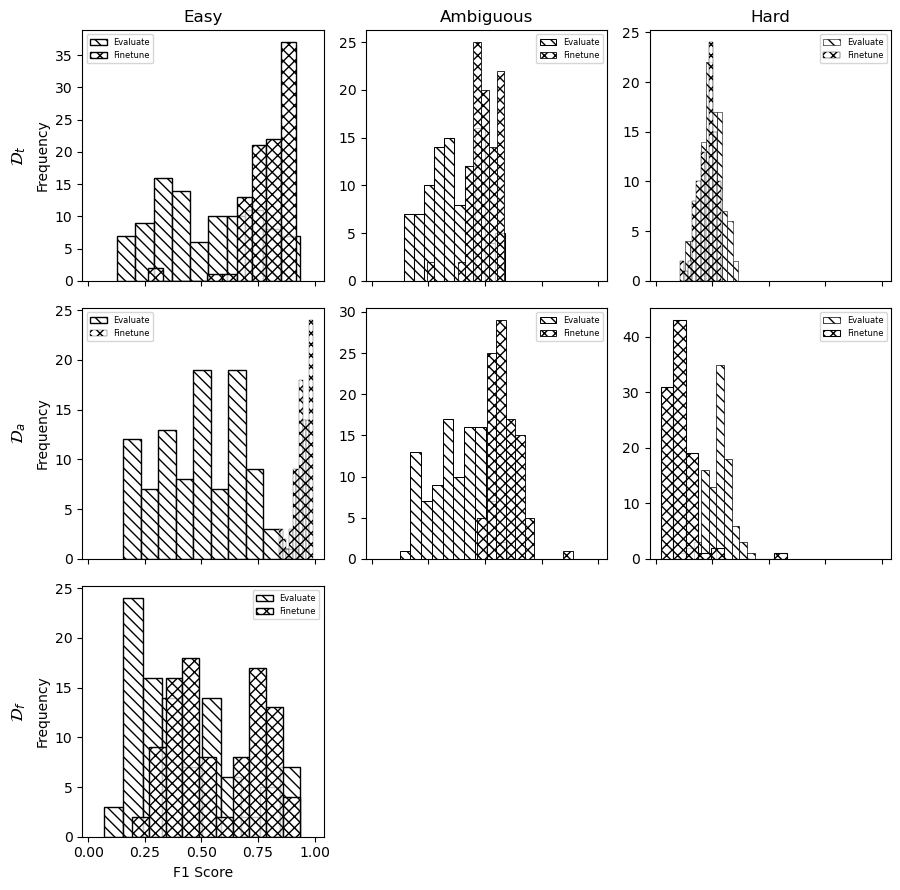

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


categories = ['TE', 'AMR', 'FP']
# light_blue_palette = ["#87CEFA", "#B0E0E6", "#ADD8E6", "#B0C4DE", "#AFEEEE", "#00BFFF"]

# colors=["#1f77b4","#aec7e8"]
# colors=["cornflowerblue","lightsalmon"]
colors=['white','white']


fig, axes = plt.subplots(3, 3, sharex=True, figsize=(9, 9))  # Changed from (3, 3) to (3, 2)

for i, category in enumerate(categories):
    eval_suffix = 'f1'
    finetune_suffix = 'test_f1'

    if category != "FP":
        for j, split in enumerate([('be', 'ae'), ('ba', 'aa'), ('bh', 'ah')]):
            df_eval = globals()[f'{category.lower()}_{split[0]}']
            df_finetune = globals()[f'{category.lower()}_{split[1]}']

            if 'e' in list(split[0]): cat = 'Easy'
            elif 'a' in list(split[0]): cat = 'Ambiguous'
            else: cat = 'Hard'

            # Plot the distribution
            sns.histplot(df_eval[eval_suffix].values, ax=axes[i, j], color=colors[0],hatch='\\\\\\',  label="Evaluate", bins=10)
            sns.histplot(df_finetune[finetune_suffix].values, ax=axes[i, j], color=colors[1] , hatch='xxx' ,label="Finetune", bins=10)

            axes[i, j].set_xlabel('F1 Score')
            if j != 0:  # Remove 'Frequency' label for columns other than the first column
                axes[i, j].set_ylabel('')
            else: axes[i, j].set_ylabel('Frequency')
            axes[i, j].legend(fontsize=6)
    else:
        for j, split in enumerate([('be', 'ae')]):
            df_eval = globals()[f'{category.lower()}_{split[0]}']
            df_finetune = globals()[f'{category.lower()}_{split[1]}']

            if 'e' in list(split[0]): cat = 'Easy'
            elif 'a' in list(split[0]): cat = 'Ambiguous'
            else: cat = 'Hard'

            # Plot the distribution
            sns.histplot(df_eval[eval_suffix].values, ax=axes[i, j], color=colors[0],hatch='\\\\\\',label="Evaluate", bins=10)
            sns.histplot(df_finetune[finetune_suffix].values, ax=axes[i, j], color=colors[1] , hatch='xxx',label="Finetune", bins=10)

            axes[i, j].set_xlabel('F1 Score')
            if j != 0:  # Remove 'Frequency' label for columns other than the first column
                axes[i, j].set_ylabel('')
            else: axes[i, j].set_ylabel('Frequency')
            axes[i, j].legend(fontsize=6)

# Remove the empty subplots at (2,1) and (2,2)
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

# Name the columns
axes[0, 0].set_title('Easy')
axes[0, 1].set_title('Ambiguous')
axes[0, 2].set_title('Hard')  # Removed this subplot

# Add labels to the left of the y-axis
for i, category in enumerate(categories):
    if category == "TE":
        label_name = r'$\mathcal{D}_{t}$'
    elif category == "FP":
        label_name = r'$\mathcal{D}_{f}$'
    else:
        label_name = r'$\mathcal{D}_{a}$'

    axes[i, 0].text(-0.3, 0.5, label_name, transform=axes[i, 0].transAxes, fontsize=12, va='center', rotation=90)

# Name the rows
# axes[0, 0].set_ylabel('TE')
# axes[1, 0].set_ylabel('AMR')
# axes[2, 0].set_ylabel('FP')

# Adjust layout
plt.tight_layout()
plt.savefig("plots/dist_f1_all_v1.pdf", dpi=300)

# Show the plot
plt.show()


/home/vamsi.srivathsa/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vamsi.srivathsa/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vamsi.srivathsa/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vamsi.srivathsa/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

FileNotFoundError: [Errno 2] No such file or directory: 'plots/dist_f1_all_vbw.pdf'

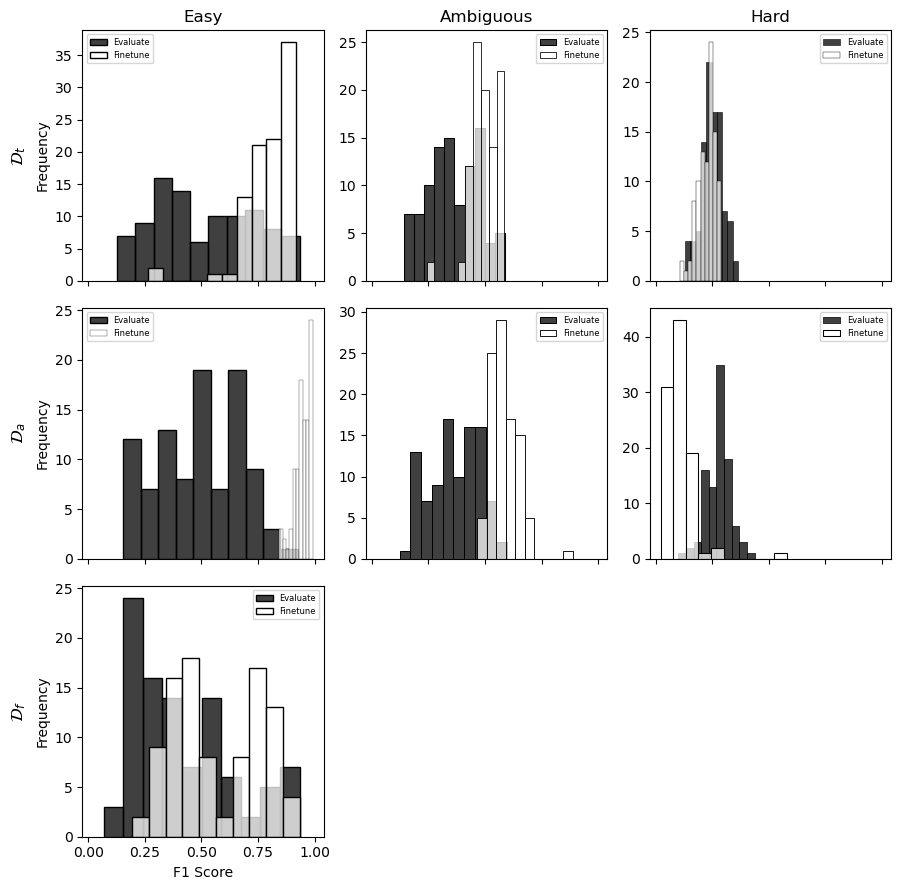

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


categories = ['TE', 'AMR', 'FP']
# light_blue_palette = ["#87CEFA", "#B0E0E6", "#ADD8E6", "#B0C4DE", "#AFEEEE", "#00BFFF"]

# colors=["#1f77b4","#aec7e8"]
# colors=["cornflowerblue","lightsalmon"]
colors=['black','white']


fig, axes = plt.subplots(3, 3, sharex=True, figsize=(9, 9))  # Changed from (3, 3) to (3, 2)

for i, category in enumerate(categories):
    eval_suffix = 'f1'
    finetune_suffix = 'test_f1'

    if category != "FP":
        for j, split in enumerate([('be', 'ae'), ('ba', 'aa'), ('bh', 'ah')]):
            df_eval = globals()[f'{category.lower()}_{split[0]}']
            df_finetune = globals()[f'{category.lower()}_{split[1]}']

            if 'e' in list(split[0]): cat = 'Easy'
            elif 'a' in list(split[0]): cat = 'Ambiguous'
            else: cat = 'Hard'

            # Plot the distribution
            sns.histplot(df_eval[eval_suffix].values, ax=axes[i, j], color=colors[0],  label="Evaluate", bins=10)
            sns.histplot(df_finetune[finetune_suffix].values, ax=axes[i, j], color=colors[1]  ,label="Finetune", bins=10)

            axes[i, j].set_xlabel('F1 Score')
            if j != 0:  # Remove 'Frequency' label for columns other than the first column
                axes[i, j].set_ylabel('')
            else: axes[i, j].set_ylabel('Frequency')
            axes[i, j].legend(fontsize=6)
    else:
        for j, split in enumerate([('be', 'ae')]):
            df_eval = globals()[f'{category.lower()}_{split[0]}']
            df_finetune = globals()[f'{category.lower()}_{split[1]}']

            if 'e' in list(split[0]): cat = 'Easy'
            elif 'a' in list(split[0]): cat = 'Ambiguous'
            else: cat = 'Hard'

            # Plot the distribution
            sns.histplot(df_eval[eval_suffix].values, ax=axes[i, j], color=colors[0],label="Evaluate", bins=10)
            sns.histplot(df_finetune[finetune_suffix].values, ax=axes[i, j], color=colors[1] , label="Finetune", bins=10)

            axes[i, j].set_xlabel('F1 Score')
            if j != 0:  # Remove 'Frequency' label for columns other than the first column
                axes[i, j].set_ylabel('')
            else: axes[i, j].set_ylabel('Frequency')
            axes[i, j].legend(fontsize=6)

# Remove the empty subplots at (2,1) and (2,2)
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

# Name the columns
axes[0, 0].set_title('Easy')
axes[0, 1].set_title('Ambiguous')
axes[0, 2].set_title('Hard')  # Removed this subplot

# Add labels to the left of the y-axis
for i, category in enumerate(categories):
    if category == "TE":
        label_name = r'$\mathcal{D}_{t}$'
    elif category == "FP":
        label_name = r'$\mathcal{D}_{f}$'
    else:
        label_name = r'$\mathcal{D}_{a}$'

    axes[i, 0].text(-0.3, 0.5, label_name, transform=axes[i, 0].transAxes, fontsize=12, va='center', rotation=90)

# Name the rows
# axes[0, 0].set_ylabel('TE')
# axes[1, 0].set_ylabel('AMR')
# axes[2, 0].set_ylabel('FP')

# Adjust layout
plt.tight_layout()
plt.savefig("plots/dist_f1_all_vbw.pdf", dpi=300)

# Show the plot
plt.show()


/home/vamsi.srivathsa/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vamsi.srivathsa/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vamsi.srivathsa/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vamsi.srivathsa/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

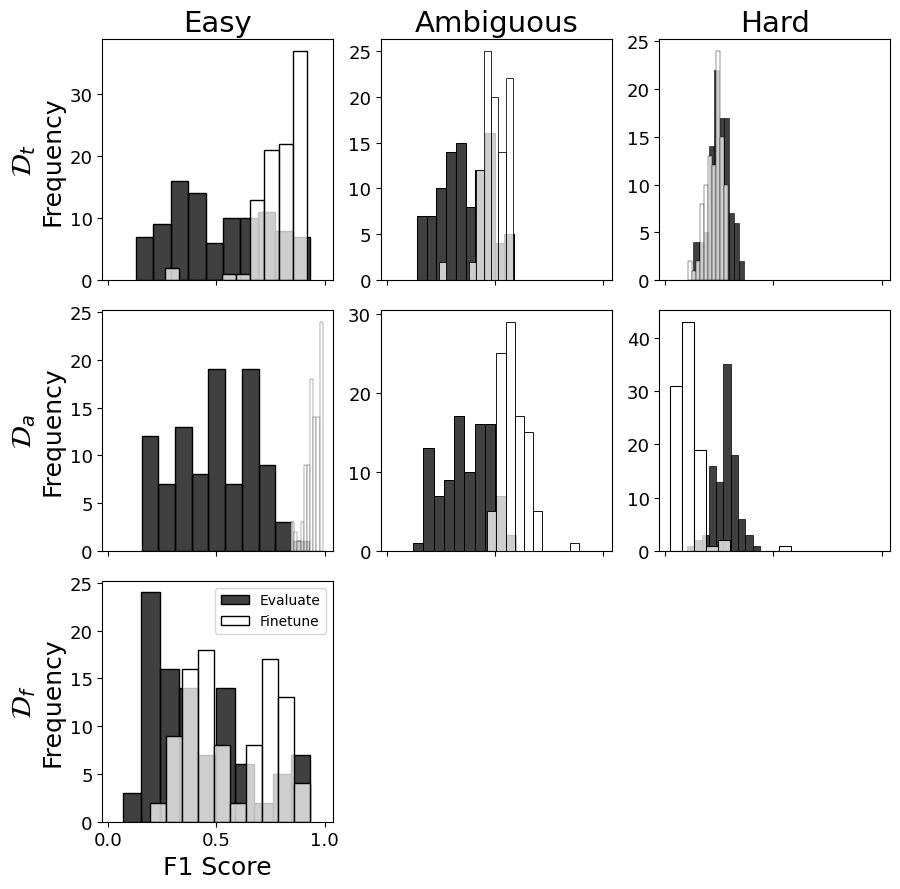

In [ ]:
## Pritam running this code

import matplotlib.pyplot as plt
import seaborn as sns


categories = ['TE', 'AMR', 'FP']
# light_blue_palette = ["#87CEFA", "#B0E0E6", "#ADD8E6", "#B0C4DE", "#AFEEEE", "#00BFFF"]

# colors=["#1f77b4","#aec7e8"]
# colors=["cornflowerblue","lightsalmon"]
colors=['black','white']


fig, axes = plt.subplots(3, 3, sharex=True, figsize=(9, 9))  # Changed from (3, 3) to (3, 2)

for i, category in enumerate(categories):
    eval_suffix = 'f1'
    finetune_suffix = 'test_f1'

    if category != "FP":
        for j, split in enumerate([('be', 'ae'), ('ba', 'aa'), ('bh', 'ah')]):
            df_eval = globals()[f'{category.lower()}_{split[0]}']
            df_finetune = globals()[f'{category.lower()}_{split[1]}']

            if 'e' in list(split[0]): cat = 'Easy'
            elif 'a' in list(split[0]): cat = 'Ambiguous'
            else: cat = 'Hard'

            # Plot the distribution
            sns.histplot(df_eval[eval_suffix].values, ax=axes[i, j], color=colors[0],  label="Evaluate", bins=10)
            sns.histplot(df_finetune[finetune_suffix].values, ax=axes[i, j], color=colors[1]  ,label="Finetune", bins=10)

            axes[i, j].set_xlabel('F1 Score',fontsize=18)
            if j != 0:  # Remove 'Frequency' label for columns other than the first column
                axes[i, j].set_ylabel('')
            else: axes[i, j].set_ylabel('Frequency', fontsize=18)
#             axes[i, j].legend(fontsize=10)
            axes[i, j].tick_params(axis='x', labelsize=13)
            axes[i, j].tick_params(axis='y', labelsize=13)
    else:
        for j, split in enumerate([('be', 'ae')]):
            df_eval = globals()[f'{category.lower()}_{split[0]}']
            df_finetune = globals()[f'{category.lower()}_{split[1]}']

            if 'e' in list(split[0]): cat = 'Easy'
            elif 'a' in list(split[0]): cat = 'Ambiguous'
            else: cat = 'Hard'

            # Plot the distribution
            sns.histplot(df_eval[eval_suffix].values, ax=axes[i, j], color=colors[0],label="Evaluate", bins=10)
            sns.histplot(df_finetune[finetune_suffix].values, ax=axes[i, j], color=colors[1] , label="Finetune", bins=10)

            axes[i, j].set_xlabel('F1 Score', fontsize=18)
            if j != 0:  # Remove 'Frequency' label for columns other than the first column
                axes[i, j].set_ylabel('')
            else: axes[i, j].set_ylabel('Frequency', fontsize=18)
            axes[i, j].legend(fontsize=10)
            axes[i, j].tick_params(axis='x', labelsize=13)
            axes[i, j].tick_params(axis='y', labelsize=13)

# Remove the empty subplots at (2,1) and (2,2)
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

# Name the columns
axes[0, 0].set_title('Easy', fontsize=21)
axes[0, 1].set_title('Ambiguous', fontsize=21)
axes[0, 2].set_title('Hard',fontsize=21)  # Removed this subplot

# Add labels to the left of the y-axis
for i, category in enumerate(categories):
    if category == "TE":
        label_name = r'$\mathcal{D}_{t}$'
    elif category == "FP":
        label_name = r'$\mathcal{D}_{f}$'
    else:
        label_name = r'$\mathcal{D}_{a}$'

    axes[i, 0].text(-0.4, 0.5, label_name, transform=axes[i, 0].transAxes, fontsize=20, va='center', rotation=90)

# Name the rows
# axes[0, 0].set_ylabel('TE')
# axes[1, 0].set_ylabel('AMR')
# axes[2, 0].set_ylabel('FP')

# Adjust layout
plt.tight_layout()
plt.savefig("plots/dist_f1_all_vbw2.pdf", dpi=300)

# Show the plot
plt.show()


In [16]:
#before: evaluate
#after: finetune

te_be=returnDF("before", "tweet_eval", "easy")
te_ae=returnDF("after", "tweet_eval", "easy")

te_ba=returnDF("before", "tweet_eval", "ambi")
te_aa=returnDF("after", "tweet_eval", "ambi")

te_bh=returnDF("before", "tweet_eval", "hard")
te_ah=returnDF("after", "tweet_eval", "hard")

amr_be=returnDF("before", "amazon_multi_reviews", "easy")
amr_ae=returnDF("after", "amazon_multi_reviews", "easy")

amr_ba=returnDF("before", "amazon_multi_reviews", "ambi")
amr_aa=returnDF("after", "amazon_multi_reviews", "ambi")

amr_bh=returnDF("before", "amazon_multi_reviews", "hard")
amr_ah=returnDF("after", "amazon_multi_reviews", "hard")

fp_be=returnDF("before", "financial_phrasebank", "easy")
fp_ae=returnDF("after", "financial_phrasebank", "easy")

In [17]:
in_domain_models = (['cardiffnlp/twitter-roberta-base-sentiment-latest',
  'cardiffnlp/twitter-xlm-roberta-base-sentiment',
  'cardiffnlp/twitter-roberta-base-sentiment',
  'finiteautomata/beto-sentiment-analysis',
  'finiteautomata/bertweet-base-sentiment-analysis',
  'cardiffnlp/twitter-xlm-roberta-base-sentiment-multilingual',
  'cardiffnlp/camembert-base-tweet-sentiment-fr',
  'j-hartmann/sentiment-roberta-large-english-3-classes',
  'neuraly/bert-base-italian-cased-sentiment',
  'citizenlab/twitter-xlm-roberta-base-sentiment-finetunned',
  'alexandrainst/da-sentiment-base',
  'shashanksrinath/News_Sentiment_Analysis'],
 ['mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis',
  'ahmedrachid/FinancialBERT-Sentiment-Analysis',
  'soleimanian/financial-roberta-large-sentiment',
  'hw2942/bert-base-chinese-finetuning-financial-news-sentiment-v2',
  'Sigma/financial-sentiment-analysis',
  'Jean-Baptiste/roberta-large-financial-news-sentiment-en'],
 ['philschmid/distilbert-base-multilingual-cased-sentiment-2',
  'poom-sci/WangchanBERTa-finetuned-sentiment',
  'blanchefort/rubert-base-cased-sentiment-rurewiews',
  'christian-phu/bert-finetuned-japanese-sentiment',
  'philschmid/distilbert-base-multilingual-cased-sentiment-2',
  'Voicelab/herbert-base-cased-sentiment'])


highlighted_models_tweet=['cardiffnlp/twitter-roberta-base-sentiment-latest',
 'cardiffnlp/twitter-roberta-base-sentiment',
 'amansolanki/autonlp-Tweet-Sentiment-Extraction-20114061',
 'finiteautomata/beto-sentiment-analysis',
 'finiteautomata/bertweet-base-sentiment-analysis',
 'cardiffnlp/twitter-xlm-roberta-base-sentiment-multilingual',
 'cardiffnlp/twitter-roberta-base-dec2021-sentiment',
 'cardiffnlp/twitter-roberta-base-2021-124m-sentiment',
 'cardiffnlp/xlm-roberta-base-sentiment-multilingual',
 'bardsai/twitter-sentiment-pl-base',
 'cardiffnlp/bert-base-multilingual-cased-sentiment-multilingual',
 'cardiffnlp/roberta-base-sentiment',
 'Timothy1337/finetuning-sentiment-all_df',
 'elozano/tweet_sentiment_eval',
 'Kapiche/twitter-roberta-base-sentiment-latest',
 'bardsai/twitter-sentiment-pl-fast',
 'sasha/autotrain-BERTBase-TweetEval-1281248996',
 'sasha/autotrain-RobertaBaseTweetEval-1281048990',
 'sasha/autotrain-BERTBase-TweetEval-1281248998',
 'sasha/autotrain-DistilBERT-TweetEval-1281148991',
 'aXhyra/presentation_sentiment_1234567',
 'sasha/autotrain-RobertaBaseTweetEval-1281048989',
 'sasha/autotrain-DistilBERT-TweetEval-1281148992',
 'sasha/autotrain-RobertaBaseTweetEval-1281048986']

highlighted_models_amazon= ['philschmid/distilbert-base-multilingual-cased-sentiment-2',
  'poom-sci/WangchanBERTa-finetuned-sentiment',
  'blanchefort/rubert-base-cased-sentiment-rurewiews',
  'christian-phu/bert-finetuned-japanese-sentiment',
  'philschmid/distilbert-base-multilingual-cased-sentiment-2',
  'Voicelab/herbert-base-cased-sentiment',
  'RashidNLP/Amazon-Deberta-Base-Sentiment',
  'arjuntheprogrammer/distilbert-base-multilingual-cased-sentiment-2']

highlighted_models_financial= ['mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis',
 'ahmedrachid/FinancialBERT-Sentiment-Analysis',
 'soleimanian/financial-roberta-large-sentiment',
 'Sigma/financial-sentiment-analysis',
 'hw2942/bert-base-chinese-finetuning-financial-news-sentiment-v2',
 'Jean-Baptiste/roberta-large-financial-news-sentiment-en',
 'FinanceInc/auditor_sentiment_finetuned',
 'bardsai/finance-sentiment-zh-base',
 'RashidNLP/Finance-Sentiment-Classification',
 'bardsai/finance-sentiment-zh-fast',
 'mrfakename/distilroberta-financial-news-tweets-sentiment-analysis',
 'bardsai/finance-sentiment-pl-fast',
 'nickwong64/bert-base-uncased-finance-sentiment',
 'IngeniousArtist/distilbert-finance',
 'bardsai/finance-sentiment-pl-base',
 'warwickai/fin-perceiver',
 'langecod/Financial_Phrasebank_RoBERTa',
 'santis2/phrasebank-sentiment-analysis',
 'bardsai/finance-sentiment-de-base',
 'bardsai/finance-sentiment-ja-base',
 'oandreae/financial_sentiment_model',
 'nuriafari/my_model',
 'bekbote/autotrain-dl-phrasebank-53436126044',
 'bardsai/finance-sentiment-es-base']

In [30]:
te_ae

,test_loss,test_accuracy,test_f1,test_precision,test_recall,test_runtime,test_samples_per_second,test_steps_per_second,model,f1_rank,...,#classes,is_sa,Source,scores,downloadsAllTime,download_rank,like_rank,lastModifiedDate,date_rank,mname
0,0.333669,0.862880,0.860716,0.847238,0.883112,17.7714,409.141,25.603,ProsusAI/finbert,29,...,3,y,NaN,NaN,42086975.0,5,1,2023-05-23 12:43:35+00:00,22,M1
1,0.497956,0.795489,0.793150,0.784891,0.811071,17.5148,415.134,25.978,yiyanghkust/finbert-tone,41,...,3,y,NaN,NaN,27429049.0,6,5,2022-10-17 00:35:39+00:00,56,M2
2,0.255705,0.896025,0.896496,0.882945,0.917286,18.0519,402.784,25.205,cardiffnlp/twitter-roberta-base-sentiment-latest,6,...,3,y,Tweets Dataset,NaN,245504181.0,1,2,2023-05-28 05:45:10+00:00,21,M3
3,0.287927,0.888461,0.888572,0.874264,0.912391,29.3846,247.443,15.484,cardiffnlp/twitter-xlm-roberta-base-sentiment,11,...,3,y,Tweets Dataset,NaN,24294835.0,9,4,2023-07-19 20:41:38+00:00,11,M4
4,0.265817,0.897126,0.896410,0.882748,0.917179,29.7845,244.120,15.276,cardiffnlp/twitter-roberta-base-sentiment,8,...,3,y,Tweets Dataset,NaN,90763177.0,3,3,2023-01-20 09:52:13+00:00,47,M5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.307673,0.883647,0.882295,0.868185,0.905247,90.3377,80.487,5.037,cardiffnlp/xlm-roberta-base-tweet-sentiment-pt,20,...,3,y,NaN,NaN,10162.0,91,47,2023-03-22 23:31:30+00:00,33,M72
70,0.337883,0.867006,0.864836,0.851913,0.885606,61.1941,118.819,7.435,aari1995/German_Sentiment,27,...,3,y,NaN,NaN,82064.0,49,78,2023-06-23 06:29:57+00:00,15,M73
71,0.707571,0.711181,0.699681,0.702091,0.716272,48.7715,149.083,9.329,JP040/bert-german-sentiment-twitter,65,...,3,y,NaN,NaN,25115.0,68,78,2021-05-18 21:14:38+00:00,98,M74
72,0.495662,0.799752,0.796899,0.789253,0.812342,64.4924,112.742,7.055,blanchefort/rubert-base-cased-sentiment-rurewiews,38,...,3,y,NaN,NaN,8659.0,94,47,2023-04-06 04:06:52+00:00,27,M75


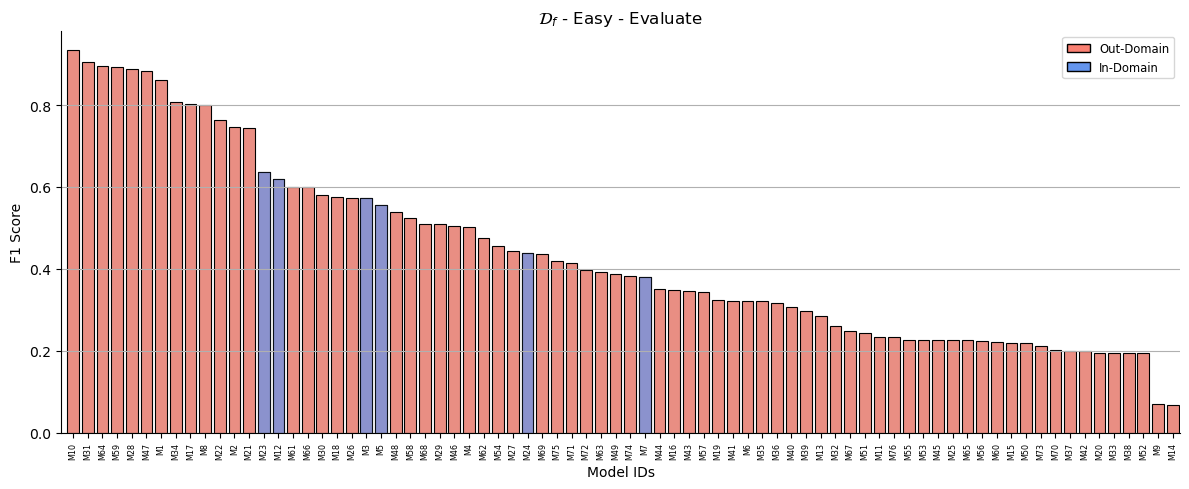

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

df_perf = fp_be  # Assuming you have loaded your DataFrame

colors = ['salmon', 'cornflowerblue']

highlighted_models = highlighted_models_tweet

df_perf = df_perf.sort_values(by='f1', ascending=False)

# Adjust bar width and spacing
bar_width = 0.8
bar_spacing = 0

plt.figure(figsize=(12, 5))

# Use Seaborn to create the barplot
sns.barplot(x='mname', y='f1', data=df_perf, color=colors[0], alpha=1.0, label='Out-Domain',
            edgecolor='black', linewidth=0.8, width=bar_width)

# Color specific bars differently
for i, model in enumerate(df_perf['model']):
    if model in highlighted_models:
        plt.bar(i + bar_spacing, df_perf['f1'].values[i], color=colors[1], alpha=0.7,
                edgecolor='black', linewidth=0.8, width=bar_width)

# Customize the plot using Seaborn
plt.xlabel('Model IDs')
plt.ylabel('F1 Score')
plt.xticks(fontsize=5.8, rotation=90)

# Define custom legend handles with hatch patterns
out_domain_patch = mpatches.Patch(facecolor=colors[0],  edgecolor='black', label='Out-Domain')
in_domain_patch = mpatches.Patch(facecolor=colors[1],  edgecolor='black', label='In-Domain')

# Create the legend with the custom handles
plt.legend(handles=[out_domain_patch, in_domain_patch], loc='upper right', fontsize='small')

plt.grid(axis='y')
sns.despine()

# Show the plot
plt.title(r"$\mathcal{D}_{f}$ - Easy - Evaluate")
# plt.title(r"$\mathcal{D}_{a}$ - Ambi - Evaluate")
# plt.title(r"$\mathcal{D}_{a}$ - Hard - Evaluate")
plt.tight_layout()
plt.savefig("plots-rohit/barplot_fp_be_e24.pdf", dpi=300)
plt.xlim(-0.8, (df_perf.shape[0]) - 0.5)
plt.show()


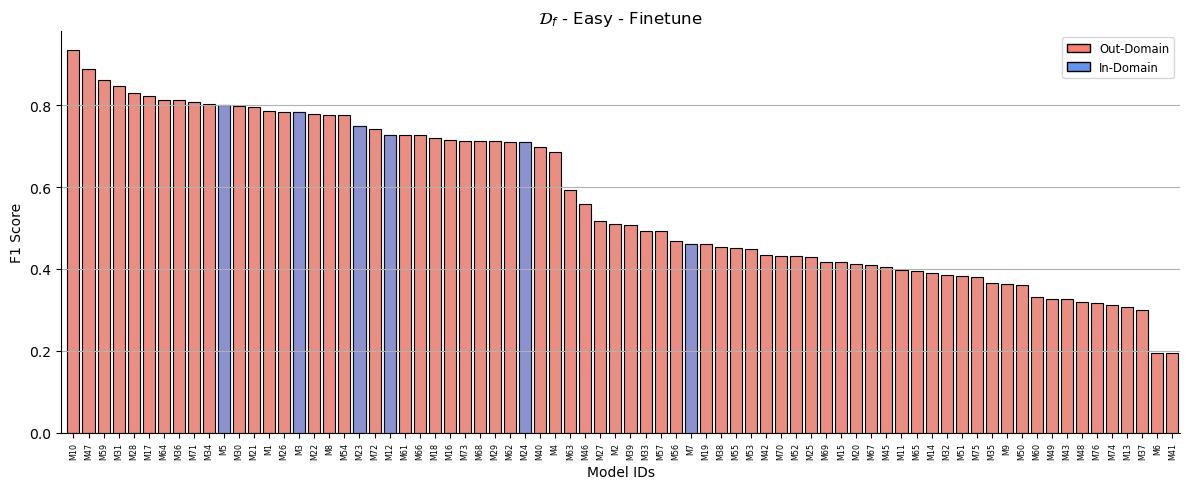

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

df_perf = fp_ae  # Assuming you have loaded your DataFrame

# colors = ['white', 'black']
colors = ['salmon', 'cornflowerblue']
highlighted_models = highlighted_models_tweet

df_perf = df_perf.sort_values(by='test_f1', ascending=False)

# Adjust bar width and spacing
bar_width = 0.8
bar_spacing = 0

plt.figure(figsize=(12, 5))

# Use Seaborn to create the barplot
sns.barplot(x='mname', y='test_f1', data=df_perf, color=colors[0], alpha=1.0, label='Out-Domain',
            edgecolor='black', linewidth=0.8, width=bar_width)

# Color specific bars differently
for i, model in enumerate(df_perf['model']):
    if model in highlighted_models:
        plt.bar(i + bar_spacing, df_perf['test_f1'].values[i], color=colors[1], alpha=0.7,
                edgecolor='black', linewidth=0.8, width=bar_width)

# Customize the plot using Seaborn
plt.xlabel('Model IDs')
plt.ylabel('F1 Score')
plt.xticks(fontsize=5.8, rotation=90)

# Define custom legend handles with hatch patterns
out_domain_patch = mpatches.Patch(facecolor=colors[0],  edgecolor='black', label='Out-Domain')
in_domain_patch = mpatches.Patch(facecolor=colors[1],  edgecolor='black', label='In-Domain')

# Create the legend with the custom handles
plt.legend(handles=[out_domain_patch, in_domain_patch], loc='upper right', fontsize='small')

plt.grid(axis='y')
sns.despine()

# Show the plot
# plt.title(r"$\mathcal{D}_{t}$ - Easy - Finetune")
# plt.title(r"$\mathcal{D}_{t}$ - Ambi - Finetune")
plt.title(r"$\mathcal{D}_{f}$ - Easy - Finetune")
plt.tight_layout()
# plt.savefig("plots/barplot_fp_ae_.pdf", dpi=300)
plt.savefig("plots-rohit/barplot_fp_ae_e24.pdf", dpi=300)
plt.xlim(-0.8, (df_perf.shape[0]) - 0.5)
plt.show()


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_perf = amr_be  # Assuming you have loaded your DataFrame

# colors=["#1f77b4","#aec7e8"]
colors=["cornflowerblue","lightsalmon"]

# List of models to be colored differently
# highlighted_models = [
#     'cardiffnlp/twitter-roberta-base-sentiment-latest',
#     'cardiffnlp/twitter-xlm-roberta-base-sentiment',
#     'cardiffnlp/twitter-roberta-base-sentiment',
#     'finiteautomata/beto-sentiment-analysis',
#     'finiteautomata/bertweet-base-sentiment-analysis',
#     'cardiffnlp/twitter-xlm-roberta-base-sentiment-multilingual',
#     'cardiffnlp/camembert-base-tweet-sentiment-fr',
#     'j-hartmann/sentiment-roberta-large-english-3-classes',
#     'neuraly/bert-base-italian-cased-sentiment',
#     'citizenlab/twitter-xlm-roberta-base-sentiment-finetunned',
#     'alexandrainst/da-sentiment-base',
#     'shashanksrinath/News_Sentiment_Analysis'
# ]

highlighted_models=in_domain_models[2]

# Sort the DataFrame by 'f1' scores in descending order
df_perf = df_perf.sort_values(by='test_f1', ascending=False)

plt.figure(figsize=(9, 3))

# Use Seaborn to create the barplot
sns.barplot(x='mname', y='test_f1', data=df_perf, color=colors[0],hatch='xxxx',alpha=1.0, label='Out-Domain')

# Color specific bars differently
for i, model in enumerate(df_perf['model']):
    if model in highlighted_models:
        plt.bar(i, df_perf['test_f1'].values[i], color=colors[1],hatch='////', alpha=0.7)  # Set a different color for highlighted models

# Customize the plot using Seaborn
plt.xlabel('Model IDs')
plt.ylabel('F1 Score')
plt.xticks(fontsize=6, rotation=90)  # Rotate x-axis labels for better readability

# # Create a custom legend
# out_domain_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor="#ADD8E6", markersize=10, label='Out-Domain')
# in_domain_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor="#E6E6FA", markersize=10, label='In-Domain')4

import matplotlib.patches as mpatches

# Define custom legend handles with hatch patterns
out_domain_patch = mpatches.Patch(facecolor=colors[0], edgecolor='black', hatch='xxxx', label='Out-Domain')
in_domain_patch = mpatches.Patch(facecolor=colors[1], edgecolor='black', hatch='////', label='In-Domain')

# Create the legend with the custom handles
plt.legend(handles=[out_domain_patch, in_domain_patch], loc='upper right', fontsize='small')


# plt.legend(handles=[out_domain_patch, in_domain_patch])

# Plot the 'download_rank' and 'like_rank' just above the bar
# for i, (model, download_rank, like_rank, date_rank) in enumerate(zip(df_perf['model'], df_perf['download_rank'], df_perf['like_rank'], df_perf['date_rank'])):
#     plt.text(i, df_perf['f1'].values[i] + 0.02, f'({download_rank}, {like_rank}, {date_rank})', ha='center', fontsize=6, color='black', rotation=90)

plt.grid(axis='y')
sns.despine()
# Show the plot
plt.title(r"$\mathcal{D}_{a}$ - Easy - Evaluate")
plt.tight_layout()
plt.savefig("plots-rohit/barplot_amr_be.pdf", dpi=300)
plt.show()


KeyError: 'test_f1'

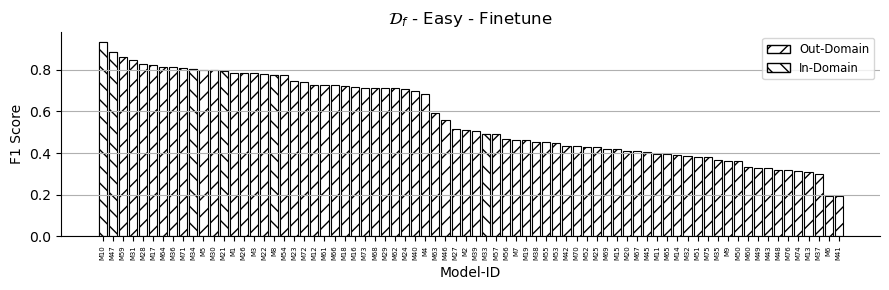

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_perf = fp_ae  # Assuming you have loaded your DataFrame

# colors=["#1f77b4","#aec7e8"]
# colors=["cornflowerblue","lightsalmon"]
colors=['white','white']

# List of models to be colored differently
# highlighted_models = [
#     'cardiffnlp/twitter-roberta-base-sentiment-latest',
#     'cardiffnlp/twitter-xlm-roberta-base-sentiment',
#     'cardiffnlp/twitter-roberta-base-sentiment',
#     'finiteautomata/beto-sentiment-analysis',
#     'finiteautomata/bertweet-base-sentiment-analysis',
#     'cardiffnlp/twitter-xlm-roberta-base-sentiment-multilingual',
#     'cardiffnlp/camembert-base-tweet-sentiment-fr',
#     'j-hartmann/sentiment-roberta-large-english-3-classes',
#     'neuraly/bert-base-italian-cased-sentiment',
#     'citizenlab/twitter-xlm-roberta-base-sentiment-finetunned',
#     'alexandrainst/da-sentiment-base',
#     'shashanksrinath/News_Sentiment_Analysis'
# ]

highlighted_models=in_domain_models[1]
# Sort the DataFrame by 'f1' scores in descending order
df_perf = df_perf.sort_values(by='test_f1', ascending=False)

plt.figure(figsize=(9, 3))

# Use Seaborn to create the barplot
sns.barplot(x='mname', y='test_f1', data=df_perf, color=colors[0],alpha=1.0,hatch='//',label='Out-Domain',edgecolor='black', linewidth=0.8)

# Color specific bars differently
for i, model in enumerate(df_perf['model']):
    if model in highlighted_models:
        plt.bar(i, df_perf['test_f1'].values[i], color=colors[1], alpha=1.0, hatch='\\\\',edgecolor='black', linewidth=0.8)  # Set a different color for highlighted models

# Customize the plot using Seaborn
plt.xlabel('Model-ID')
plt.ylabel('F1 Score')
plt.xticks(fontsize=5, rotation=90)  # Rotate x-axis labels for better readability

# # Create a custom legend
# out_domain_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor="#ADD8E6", markersize=10, label='Out-Domain')
# in_domain_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor="#E6E6FA", markersize=10, label='In-Domain')4

import matplotlib.patches as mpatches

# Define custom legend handles with hatch patterns
out_domain_patch = mpatches.Patch(facecolor=colors[0], hatch='//',edgecolor='black',label='Out-Domain')
in_domain_patch = mpatches.Patch(facecolor=colors[1], hatch='\\\\',edgecolor='black',label='In-Domain')

# Create the legend with the custom handles
plt.legend(handles=[out_domain_patch, in_domain_patch], loc='upper right', fontsize='small')


# plt.legend(handles=[out_domain_patch, in_domain_patch])

# Plot the 'download_rank' and 'like_rank' just above the bar
# for i, (model, download_rank, like_rank, date_rank) in enumerate(zip(df_perf['model'], df_perf['download_rank'], df_perf['like_rank'], df_perf['date_rank'])):
#     plt.text(i, df_perf['f1'].values[i] + 0.02, f'({download_rank}, {like_rank}, {date_rank})', ha='center', fontsize=6, color='black', rotation=90)

plt.grid(axis='y')
sns.despine()
# Show the plot
plt.title(r"$\mathcal{D}_{f}$ - Easy - Finetune")
plt.tight_layout()
plt.savefig("plots/barplot_fp_ae.pdf", dpi=300)
plt.show()


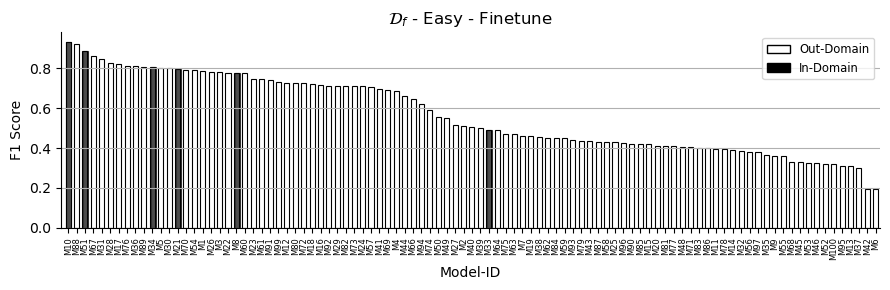

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

df_perf = fp_ae  # Assuming you have loaded your DataFrame

colors = ['white', 'black']

highlighted_models = in_domain_models[1]

df_perf = df_perf.sort_values(by='test_f1', ascending=False)

# Adjust bar width and spacing
bar_width = 0.6
bar_spacing = 0.1

plt.figure(figsize=(9, 3))

# Use Seaborn to create the barplot
sns.barplot(x='mname', y='test_f1', data=df_perf, color=colors[0], alpha=1.0, label='Out-Domain',
            edgecolor='black', linewidth=0.8, width=bar_width)

# Color specific bars differently
for i, model in enumerate(df_perf['model']):
    if model in highlighted_models:
        plt.bar(i + bar_spacing, df_perf['test_f1'].values[i], color=colors[1], alpha=0.7,
                edgecolor='black', linewidth=0.8, width=bar_width)

# Customize the plot using Seaborn
plt.xlabel('Model-ID')
plt.ylabel('F1 Score')
plt.xticks(fontsize=6, rotation=90)

# Define custom legend handles with hatch patterns
out_domain_patch = mpatches.Patch(facecolor=colors[0],  edgecolor='black', label='Out-Domain')
in_domain_patch = mpatches.Patch(facecolor=colors[1],  edgecolor='black', label='In-Domain')

# Create the legend with the custom handles
plt.legend(handles=[out_domain_patch, in_domain_patch], loc='upper right', fontsize='small')

plt.grid(axis='y')
sns.despine()

# Show the plot
plt.title(r"$\mathcal{D}_{f}$ - Easy - Finetune")
plt.tight_layout()
plt.savefig("plots/barplot_fp_ae.pdf", dpi=300)
plt.xlim(-0.8, (df_perf.shape[0]) - 0.5)
plt.show()


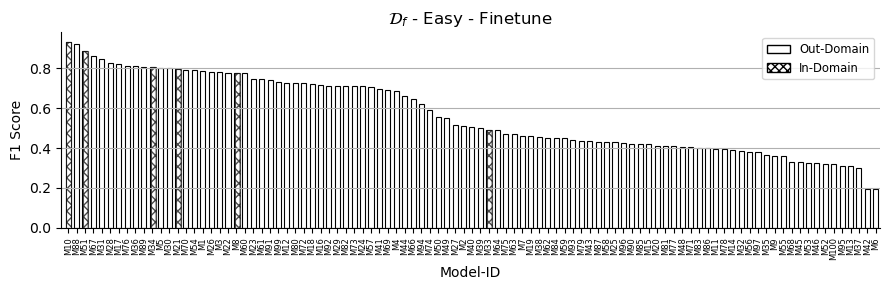

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

df_perf = fp_ae  # Assuming you have loaded your DataFrame

colors = ['white', 'white']

highlighted_models = in_domain_models[1]

df_perf = df_perf.sort_values(by='test_f1', ascending=False)

# Adjust bar width and spacing
bar_width = 0.6
bar_spacing = 0.1

plt.figure(figsize=(9, 3))

# Use Seaborn to create the barplot
sns.barplot(x='mname', y='test_f1', data=df_perf, color=colors[0], alpha=1.0, label='Out-Domain',
            edgecolor='black', linewidth=0.8, width=bar_width)

# Color specific bars differently
for i, model in enumerate(df_perf['model']):
    if model in highlighted_models:
        plt.bar(i + bar_spacing, df_perf['test_f1'].values[i], color=colors[1], hatch='xxx',alpha=0.7,
                edgecolor='black', linewidth=0.8, width=bar_width)

# Customize the plot using Seaborn
plt.xlabel('Model-ID')
plt.ylabel('F1 Score')
plt.xticks(fontsize=6, rotation=90)

# Define custom legend handles with hatch patterns
out_domain_patch = mpatches.Patch(facecolor=colors[0],  edgecolor='black', label='Out-Domain')
in_domain_patch = mpatches.Patch(facecolor=colors[1], hatch='xxxx', edgecolor='black', label='In-Domain')

# Create the legend with the custom handles
plt.legend(handles=[out_domain_patch, in_domain_patch], loc='upper right', fontsize='small')

plt.grid(axis='y')
sns.despine()

# Show the plot
plt.title(r"$\mathcal{D}_{f}$ - Easy - Finetune")
plt.tight_layout()
plt.savefig("plots/barplot_fp_ae.pdf", dpi=300)
plt.xlim(-0.8, (df_perf.shape[0]) - 0.5)
plt.show()


In [ ]:
te_be.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   accuracy               98 non-null     float64            
 1   f1                     98 non-null     float64            
 2   precision              98 non-null     float64            
 3   recall                 98 non-null     float64            
 4   total_time_in_seconds  98 non-null     float64            
 5   samples_per_second     98 non-null     float64            
 6   latency_in_seconds     98 non-null     float64            
 7   model                  98 non-null     object             
 8   f1_rank                98 non-null     int64              
 9   Ouput                  98 non-null     object             
 10  _id                    98 non-null     object             
 11  downloads              98 non-null     float64            
 

In [ ]:
te_ae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   test_loss                97 non-null     float64            
 1   test_accuracy            97 non-null     float64            
 2   test_f1                  97 non-null     float64            
 3   test_precision           97 non-null     float64            
 4   test_recall              97 non-null     float64            
 5   test_runtime             97 non-null     float64            
 6   test_samples_per_second  97 non-null     float64            
 7   test_steps_per_second    97 non-null     float64            
 8   model                    97 non-null     object             
 9   f1_rank                  97 non-null     int64              
 10  Ouput                    97 non-null     object             
 11  _id                      97 non-nu